In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/home/mahima/datas/spam.csv',encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape


(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.rename(columns={'v1':'Target','v2':'Message'},inplace=True)

In [10]:
df

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['Target'] = encoder.fit_transform(df['Target'])

In [13]:
df

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x7f5007b37e20>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

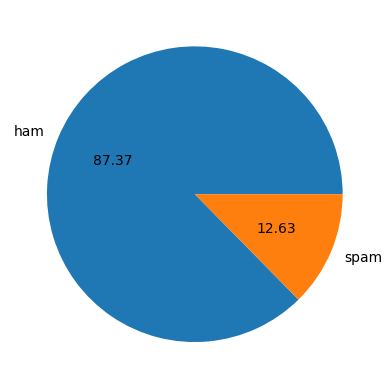

In [19]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%.2f')

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mahima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['Count_c']=df['Message'].apply(len)

/tmp/ipykernel_3164/3476282202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count_c']=df['Message'].apply(len)


In [23]:
df['Count_w'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipykernel_3164/104981334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count_w'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
df

,Target,Message,Count_c,Count_w
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [25]:
df['Count_s']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipykernel_3164/998311813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count_s']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df

,Target,Message,Count_c,Count_w,Count_s
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
df[['Count_c','Count_w','Count_s']].describe()

,Count_c,Count_w,Count_s
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
df[df['Target']==0][['Count_c','Count_w','Count_s']].describe() #ham

,Count_c,Count_w,Count_s
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
df[df['Target']==1][['Count_c','Count_w','Count_s']].describe() #spam

,Count_c,Count_w,Count_s
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import seaborn as sns

In [31]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<AxesSubplot:xlabel='Count_c', ylabel='Count'>

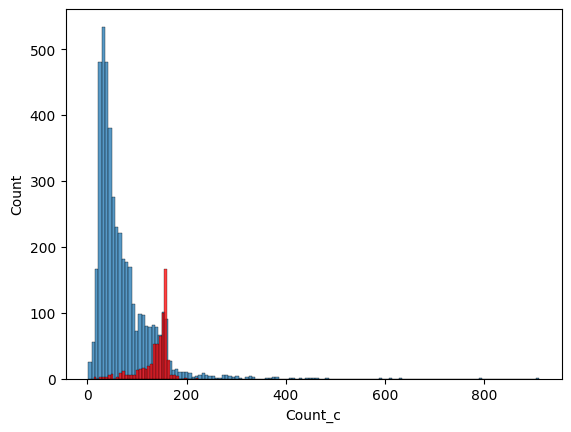

In [32]:
sns.histplot(df[df['Target']==0]['Count_c'])
sns.histplot(df[df['Target']==1]['Count_c'],color='red')

<AxesSubplot:xlabel='Count_w', ylabel='Count'>

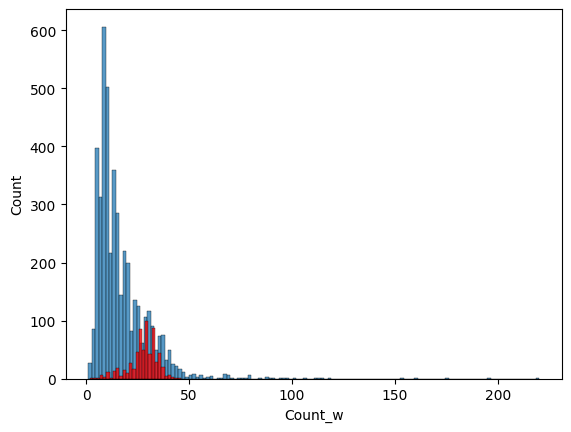

In [33]:
sns.histplot(df[df['Target']==0]['Count_w'])
sns.histplot(df[df['Target']==1]['Count_w'],color='red')

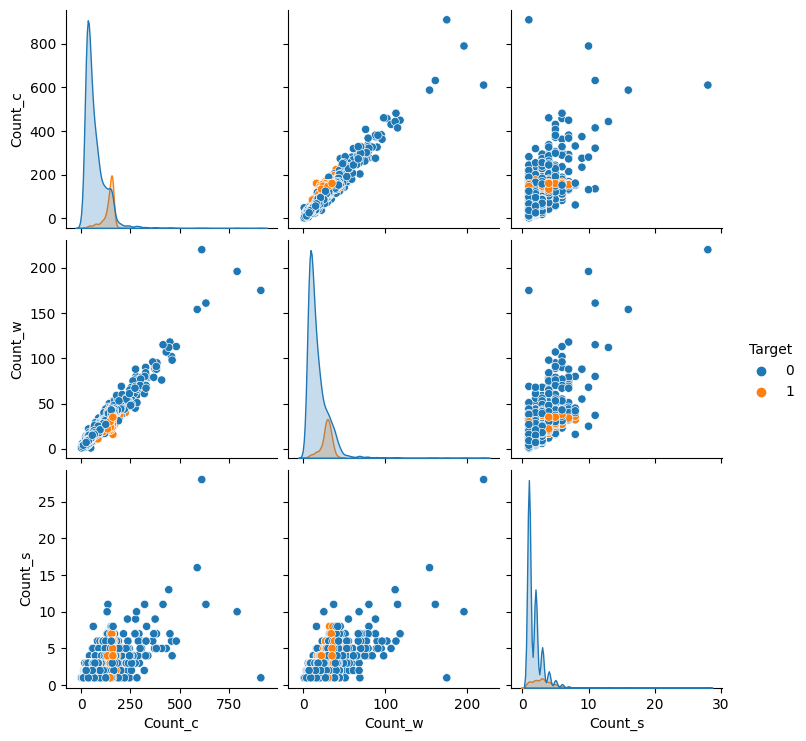

In [34]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

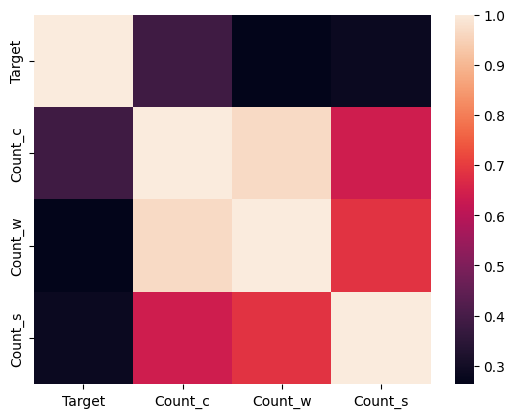

In [35]:
sns.heatmap(df.corr())

In [36]:
def transform(m):
    m = m.lower()
    m = nltk.word_tokenize(m)
    y=[]
    
    
    for i in m:
        if i.isalnum():
            y.append(i)
    m = y[:]
    y.clear()
    
    
    for i in m:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    m = y[:]
    y.clear()
    
    for i in m:
        y.append(ps.stem(i))

            
    return " ".join(y)

In [37]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
transform('go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
df['Updated_message'] = df['Message'].apply(lambda x:transform(x))

/tmp/ipykernel_3164/2670422101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Updated_message'] = df['Message'].apply(lambda x:transform(x))


In [41]:
from wordcloud import WordCloud

In [42]:
wc = WordCloud(width=500,height=500)

In [43]:
spam_wc = wc.generate(df[df['Target']==1]['Updated_message'].str.cat(sep=" "))

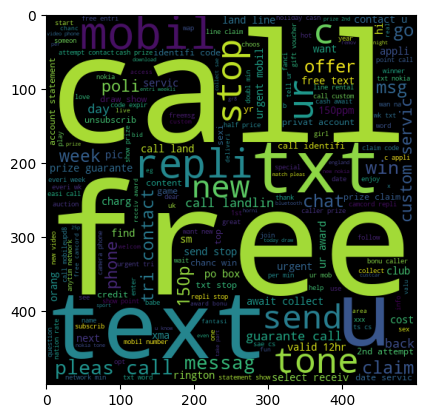

In [44]:
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['Target']==0]['Updated_message'].str.cat(sep=" "))

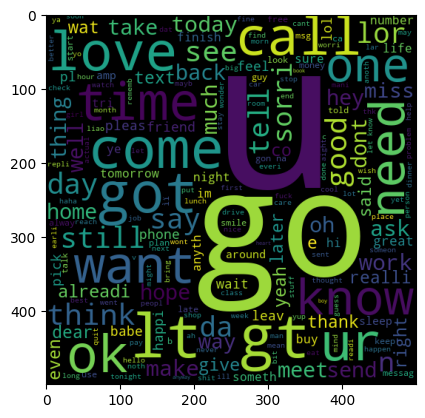

In [46]:
plt.imshow(ham_wc)

In [47]:
spam_word = []
for i in df[df['Target']==1]['Updated_message'].tolist():
    for j in i.split():
        spam_word.append(j)
spam_word

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [48]:
len(spam_word)

9939

In [49]:
from collections import Counter
pd.DataFrame(Counter(spam_word).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


/home/mahima/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

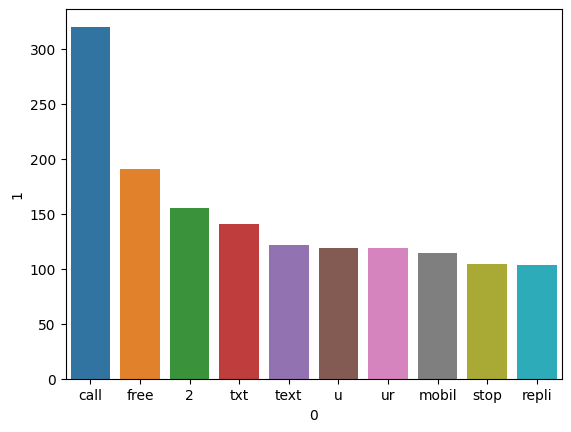

In [50]:
sns.barplot(pd.DataFrame(Counter(spam_word).most_common(10))[0],pd.DataFrame(Counter(spam_word).most_common(10))[1])

In [51]:
ham_word = []
for i in df[df['Target']==0]['Updated_message'].tolist():
    for j in i.split():
        ham_word.append(j)
ham_word

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [52]:
pd.DataFrame(Counter(ham_word).most_common(10))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
x = tfidf.fit_transform(df['Updated_message']).toarray()

In [63]:
y = df['Target'].values

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

BernoulliNB()

In [68]:
prediction = gnb.predict(x_test)
prediction1 = mnb.predict(x_test)
prediction2 = bnb.predict(x_test)

In [69]:
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(precision_score(y_test,prediction))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [70]:
print(accuracy_score(y_test,prediction1))
print(confusion_matrix(y_test,prediction1))
print(precision_score(y_test,prediction1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [71]:
print(accuracy_score(y_test,prediction2))
print(confusion_matrix(y_test,prediction2))
print(precision_score(y_test,prediction2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [72]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))